<a href="https://colab.research.google.com/github/NiroginiJanstin/ML_Assignment2_IT18412994_IT18218336_IT18216592/blob/master/Smoking_Status_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [360]:
import numpy
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sbrn
import plotly.express as ploex


# ***Load Dataset***

In [361]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [363]:
data = pd.read_csv('/content/drive/MyDrive/smoking.csv')

In [364]:
data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [365]:
data.shape

(55692, 27)

In [366]:
data.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [367]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [368]:
print(data.isnull().sum())

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64


# ***Visualization of Data***

***`Categorical columns data visualization`***

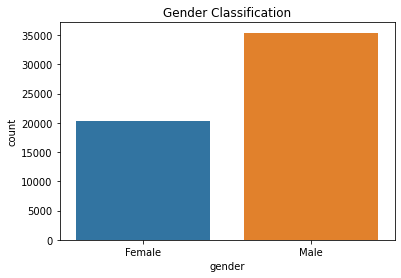

In [ ]:
gender_plt = sbrn.countplot(x='gender',data=data)
gender_plt.set_xticklabels(labels=['Female', 'Male'])
plt.title("Gender Classification")
plt.show()

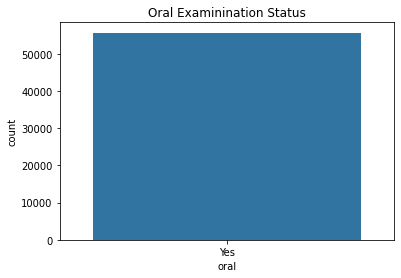

In [ ]:
oral_plt = sbrn.countplot(x='oral',data=data)
oral_plt.set_xticklabels(labels=['Yes', 'No'])
plt.title("Oral Examinination Status")
plt.show()

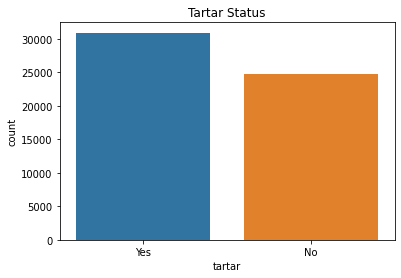

In [ ]:
tar_plt = sbrn.countplot(x='tartar',data=data)
tar_plt.set_xticklabels(labels=['Yes', 'No'])
plt.title("Tartar Status")
plt.show()

***`Continuos columns data visualization`***

In [ ]:
data = data.rename(columns={'height(cm)': 'height'})
data = data.rename(columns={'weight(kg)': 'weight'})
data = data.rename(columns={'waist(cm)': 'waist'})
data = data.rename(columns={'eyesight(left)': 'l-eyesight'})
data = data.rename(columns={'eyesight(right)': 'r-eyesight'})
data = data.rename(columns={'hearing(left)': 'l-hearing'})
data = data.rename(columns={'hearing(right)': 'r-hearing'})

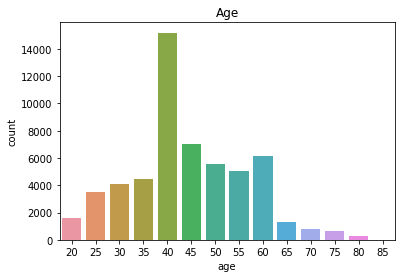

In [ ]:
sbrn.countplot(x='age',data=data)
plt.title("Age")
plt.show()

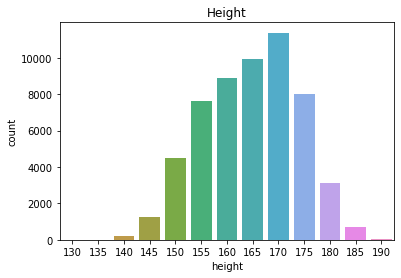

In [ ]:
sbrn.countplot(x='height',data=data)
plt.title("Height")
plt.show()

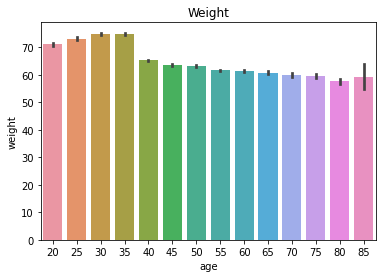

In [ ]:
#Weight 
sbrn.barplot(x='age',y='weight',data=data)
plt.title("Weight")
plt.show()

In [ ]:
#waist 

In [ ]:
#eyesight(left)

In [ ]:
#eyesight(right)

In [ ]:
#hearing(left)

In [ ]:
#hearing(right)

# ***Analysis of Data***

# ***Pre-processing dataset***

In [369]:
data.drop(['ID'], axis = 1)

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,F,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,F,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,F,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,M,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


In [370]:
data['gender'] = data['gender'].map(dict(M=1, F=0))
data['oral'] = data['oral'].map(dict(Y=1, N=0))
data['tartar'] = data['tartar'].map(dict(Y=1, N=0))

In [371]:
data.drop_duplicates(subset=None, keep='first', inplace=False)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,1,0,1,0
1,1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,1,0,1,0
2,2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,1,0,0,1
3,3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,1,0,1,0
4,4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,0,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,1,1,1,0
55688,55681,0,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,1,0,1,0
55689,55683,0,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,1,0,0,0
55690,55684,1,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,1,0,0,0


In [372]:
data.shape

(55692, 27)

*Split dataset*

In [373]:
#split the dataset
X = data.iloc[:, :-1]
y = data.iloc[:,-1]


In [374]:
#print X
X

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,1,0,1
1,1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,1,0,1
2,2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,1,0,0
3,3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,1,0,1
4,4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,0,40,170,65,75.0,0.9,0.9,1.0,1.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,1,1
55688,55681,0,45,160,50,70.0,1.2,1.2,1.0,1.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,1,0,1
55689,55683,0,55,160,50,68.5,1.0,1.2,1.0,1.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,1,0,0
55690,55684,1,60,165,60,78.0,0.8,1.0,1.0,1.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,1,0,0


In [375]:
#print y
y

0        0
1        0
2        1
3        0
4        0
        ..
55687    0
55688    0
55689    0
55690    0
55691    1
Name: smoking, Length: 55692, dtype: int64

In [377]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [378]:
X_train.shape

(44553, 26)

In [379]:
X_test.shape

(11139, 26)

In [380]:
y_train.shape

(44553,)

In [381]:
y_test.shape

(11139,)

# ***Training the Models***

*Decision Tree*

In [386]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier(random_state=0)

In [387]:
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [388]:
#Check the accuracy
score_decision_tree = decision_tree_classifier.score(X_test, y_test)

0.767034742795583

In [392]:
#making prediction
decision_tree_classifier.predict(X_test[108:113])

array([0, 1, 1, 0, 1])

In [393]:
y_test[108:113]

49980    0
50891    0
9284     1
10450    0
31691    1
Name: smoking, dtype: int64

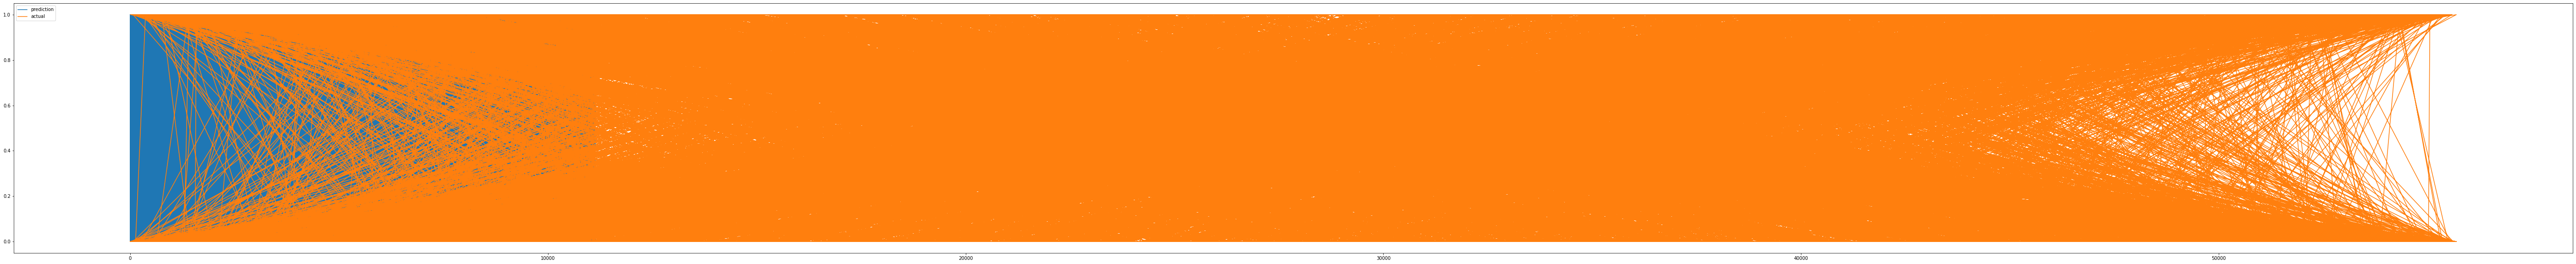

In [391]:
#predicted and actual value representaion
predict = decision_tree_classifier.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (100,10)
plt.plot(predict,label='prediction')
plt.plot(y_test,label='actual')
plt.legend(loc="upper left")
plt.show()


*Random Forest Classifier*

In [394]:
from sklearn.ensemble import RandomForestClassifier


In [395]:
random_forest_classfier = RandomForestClassifier(n_estimators=100)

In [396]:
random_forest_classfier.fit(X_train, y_train)

RandomForestClassifier()

In [397]:
score_random_forest = random_forest_classfier.score(X_test,y_test)

0.8256575994254421

In [398]:
random_forest_classfier.predict(X_test[108:113])

array([0, 0, 0, 0, 1])

In [399]:
y_test[108:113]

49980    0
50891    0
9284     1
10450    0
31691    1
Name: smoking, dtype: int64